# Proyecto Final

#### Mónica Ángeles Sánchez 317159662

In [135]:
# Biblioteca:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plot
import math

In [136]:
# Creamos una función que genera una solución aleatoria asignando un color aleatorio a cada vértice.

def solucion_aleatoria(num_vertices):
    rand = random.Random(42)
    solucion = []
    for i in range(num_vertices):
        color = rand.randint(1, num_vertices)
        solucion.append(color)
    return solucion

In [137]:
# Creamos una función que genera una solución vecina modificando el color de un vértice
# seleccionado aleatoriamente asegurándose de que la nueva solución cumpla con las
# restricciones del problema, es decir, que ningún vértice adyacente tenga el mismo color.

def generar_solucion_vecina(solucion_actual, matriz_adyacencia, num_vertices):
    solucion_vecina = solucion_actual[:]
    rand = random.Random()
    # Seleccionamos un vértice aleatorio
    vertice = rand.randint(0, num_vertices - 1)
    # Inicializa una lista para ver qué colores ya están asignados a los vértices adyacentes
    colores_usados = [False] * (num_vertices + 1)
    for i in range(num_vertices):
        # Si el vértice aleatorio y el vértice i son adyacentes, 
        # indicamos que el color solucion_actual[i] está siendo utilizado 
        if matriz_adyacencia[vertice][i] == 1:
            colores_usados[solucion_actual[i]] = True

    # Almacena la frecuencia de colores y el color
    frecuencias_colores = [[i, 0] for i in range(num_vertices + 1)]

    # Cuenta la frecuencia de cada color en la solución actual
    for color in solucion_actual:
        if color != 0:
            frecuencias_colores[color][1] += 1

    # Ordena los colores por su frecuencia de mayor a menor
    frecuencias_colores.sort(key=lambda x: x[1], reverse=True)

    # Intentar asignar el color más frecuente, luego el segundo más frecuente, y así sucesivamente
    for i in range(num_vertices):
        color_candidato = frecuencias_colores[i][0]
        if not colores_usados[color_candidato]:
            solucion_vecina[vertice] = color_candidato
            break
    # Regresa un arreglo de enteros que representan los colores de la solución vecina
    return solucion_vecina

In [138]:
# Creamos una función que toma como entrada una solución dada, que es una lista de colores
# asignados a cada vértice de una gráfica, y devuelve el número total de colores distintos 
# utilizados en esa solución para colorear la gráfica.

def evaluar_solucion(solucion):
    colores_usados = [False] * (num_vertices + 1)
    total_colores = 0
    # Itera sobre la solución, marca los colores ya utilizados y cuenta el número de apariciones
    for color in solucion:
        if not colores_usados[color]:
            colores_usados[color] = True
            total_colores += 1
    # Regresa el número de colores utilizados para colorear la gráfica
    return total_colores

In [139]:
def busqueda_tabu(matriz_adyacencia, num_vertices, max_iteraciones, tam_tabu):
    mejor_solucion = solucion_aleatoria(num_vertices)
    mejor_valor_fo = evaluar_solucion(mejor_solucion)
    lista_tabu = []
    iteracion_actual = 0

    while iteracion_actual < max_iteraciones:
        vecinos = [generar_solucion_vecina(sol_inicial, matriz_adyacencia, num_vertices) for _ in range(5)]
        valores_fo = [evaluar_solucion(vecino) for vecino in vecinos]
        mejor_vecino = None
        mejor_valor_vecino = float('inf')

        for vecino, valor_fo in zip(vecinos, valores_fo):
            if vecino not in lista_tabu:
                if valor_fo < mejor_valor_vecino:
                    mejor_vecino = vecino
                    mejor_valor_vecino = valor_fo

        if mejor_vecino is None:
            break  # No se encontraron movimientos no tabú, terminar la búsqueda

        mejor_solucion = mejor_vecino
        mejor_valor_fo = mejor_valor_vecino
        lista_tabu.append(mejor_vecino)
        
        if len(lista_tabu) > tam_tabu:
            lista_tabu.pop(0)  # Eliminar el movimiento más antiguo de la lista tabú

        iteracion_actual += 1

    return mejor_solucion, mejor_valor_fo


In [150]:
# EJEMPLO 
# Definimos la matriz de adyacencia como una lista de listas
# La matriz de adyacencia representa una gráfica no dirigida con 10 vértices. 
# Cada fila de la matriz corresponde a un vértice, y el valor en la posición [i][j] indica si hay una arista 
# entre el vértice i y el vértice j (1 si hay una arista, 0 si no la hay).

matriz_adyacencia = [
    [0, 1, 1, 0, 0, 1, 0, 0, 0, 1], # Vértice 0
    [1, 0, 0, 1, 0, 1, 0, 0, 1, 0], # Vértice 1
    [1, 0, 0, 0, 1, 0, 0, 1, 0, 0], # Vértice 2
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0], # Vértice 3
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 1], # Vértice 4
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0], # Vértice 5
    [0, 0, 0, 1, 0, 0, 0, 1, 0, 1], # Vértice 6
    [0, 0, 1, 0, 1, 0, 1, 0, 0, 0], # Vértice 7
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0], # Vértice 8
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 0] # Vértice 9
]

# Definimos el número de vértices
num_vertices = len(matriz_adyacencia)

# Definimos como criterio de paro un número máximo de iteraciones 
max_iteraciones = 100

# Definimos el número de iteraciones que permanecerá en la lista tabú.
tam_tabu = 5

In [158]:
# Ejecutamos la búsqueda tabu
busqueda_tabu(matriz_adyacencia, num_vertices, max_iteraciones, tam_tabu)

([4, 6, 7, 3, 4, 3, 2, 3, 4, 9], 6)

In [159]:
solucion_final = busqueda_tabu(matriz_adyacencia, num_vertices, max_iteraciones, tam_tabu)[0]

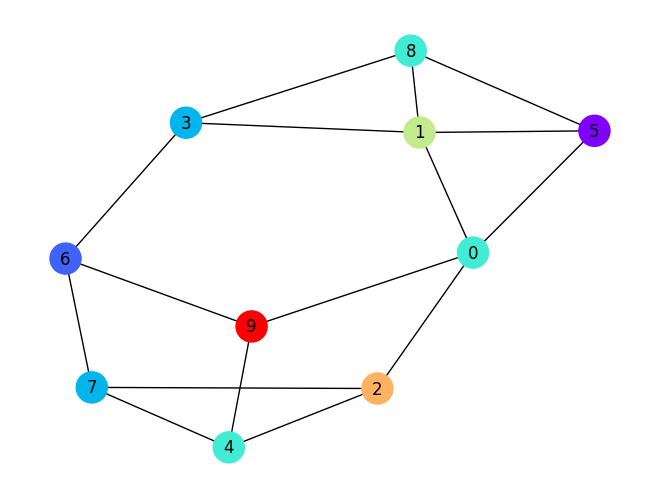

In [161]:
# Graficamos la solución obtenida

import matplotlib.pyplot as plt

# Creamos la función para dibujar la gráfica 
def dibujar_grafica(matriz_adyacencia, solucion_final):
    G = nx.Graph()
    # Se agrega cada vértice de la matriz como un nodo a la gráfica
    for i in range(len(matriz_adyacencia)):
        G.add_node(i)
    # Se agrega una arista entre los vértices i y j si la hay 
    for i in range(len(matriz_adyacencia)):
        for j in range(i + 1, len(matriz_adyacencia[i])):
            if matriz_adyacencia[i][j] == 1:
                G.add_edge(i, j)

    # Se asignan colores a los nodos según la solución final
    colors = [solucion_final[node] for node in G.nodes()]

    # Dibujamos la gráfica 
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color=colors, cmap=plt.cm.rainbow, node_size=500)
    plt.show()

# Dibujar la gráfica con la solución final
dibujar_grafica(matriz_adyacencia, solucion_final)